In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
#reading from the csv 
df=pd.read_csv('phones.csv')
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [3]:
#Having a look at the number of columns the dataset has 
print(df.columns)

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD)'],
      dtype='object')


In [9]:
#i'll drop all columns with the  name video in them since i'll not be using them in this analysis
#bellow is a list for storing all columns with 'video' in them
columns_with_Video=[]
#looping through the list of columns
for column in df.columns:
    #querying for columns with name like video
    if 'video' in column:
       #appending all those columns into the reserved list
        columns_with_Video.append(column)

In [10]:
#Doing the actual droping of  of the columns and saving the new dataset with fewer columns as an excel file
df=df.drop(columns_with_Video,axis=1)
#saving to a new dataset in excel format
df.to_excel('cleaner_phones.xlsx',index=False)

# This is now the new dataset i'll be using for this analysis

In [19]:
#let's have a look at the head of our new dataset
new_df=pd.read_excel('cleaner_phones.xlsx')
new_df.head(3)

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140,16,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140,16,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147,16,420.0


In [ ]:
#Let's do some cleaning on the "OS" column
new_df["OS"]=new_df['os'].astype(str).apply(lambda x:x.split(" "))[0]

In [13]:
#as you can see the new dataset has fewer columns
print(f"The new dataset only has {len(new_df.columns)} columns")

The new dataset only has 12 columns


# 1::Which Manufacture(brand) Owns the most phones

In [13]:
#Bellow variable stores the total number of phones , this should be equivalent to the number of rows in the dataset
total_phones=0
#Bellow is a list of all manufacturers/brands
manufacturers=new_df.brand.unique()
#the following list stores the brand total phones
manufacturer_total_list=[]
#looping through the list of mannufacturers
for manufacturer in manufacturers:
    manufacturer_total_phones=f"{manufacturer}_total_phones"
    manufacturer_total_phones=0
    #looping through the entire dataset
    for i in range(len(new_df)):
        if new_df.loc[i].brand==manufacturer:
            manufacturer_total_phones+=1
    print(f"{manufacturer} :: {manufacturer_total_phones} phones")
    total_phones+=manufacturer_total_phones
    manufacturer_total_list.append(manufacturer_total_phones)
print(f"Total phones = {total_phones} phones")

Huawei :: 137 phones
LG :: 75 phones
Xiaomi :: 264 phones
Sony :: 37 phones
Oppo :: 213 phones
Samsung :: 206 phones
Lenovo :: 43 phones
Apple :: 22 phones
Google :: 19 phones
Honor :: 124 phones
Realme :: 157 phones
OnePlus :: 47 phones
Vivo :: 168 phones
Total phones = 1512 phones


# Visualizing my findings.....

Text(0.5, 1.0, 'Manufacturers And Phones Associated to Them')

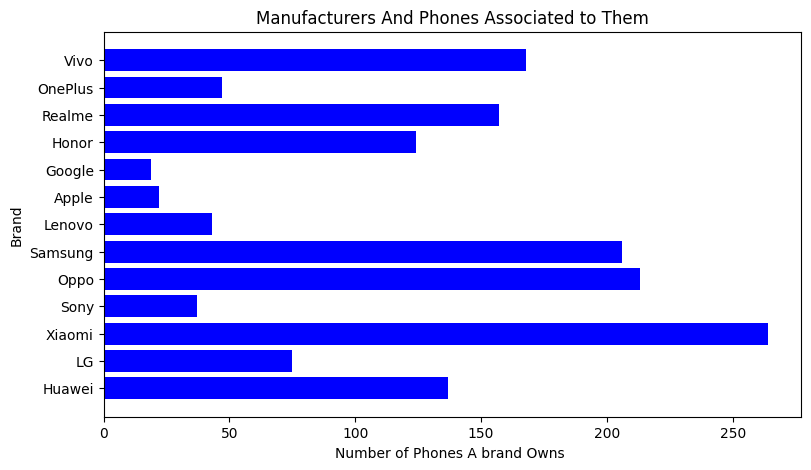

In [17]:
#ploting a graph
plt.figure(figsize=(9,5))
plt.barh(manufacturers,manufacturer_total_list,color="blue")
plt.xlabel("Number of Phones A brand Owns ")
plt.ylabel("Brand")
plt.title("Manufacturers And Phones Associated to Them")

# 2:Which is the most popular battery type used in Phones?.Visualize your findings

In [17]:
#Bellow is a list of battery type
battery_types=new_df['battery_type'].unique()
#This list stores the number of phones that use certain battery types
phones_using_various_battery_type=[]
#looping through the list above
for battery_type in battery_types:
    battery_type_phones=f"{battery_type}_phones"
    battery_type_phones=0
    #loping through the dataframe
    for i in range(len(new_df)):
        if df.loc[i].battery_type==battery_type:
            battery_type_phones+=1
    phones_using_various_battery_type.append(battery_type_phones)
    print(f"{battery_type_phones} use {battery_type} batteries ")


1242 use Li-Po batteries 
270 use Li-Ion batteries 


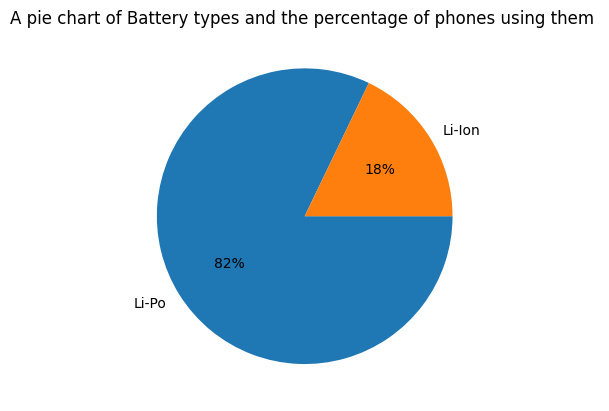

In [18]:
#visualizing my findings using a piechart
plt.title("A pie chart of Battery types and the percentage of phones using them ")
plt.pie(phones_using_various_battery_type,labels=battery_types,autopct='%1.f%%',counterclock=False)
plt.show()